In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r"C:\Users\Abhim\Documents\Python_Programs\airfare_dset\Cleaned_dataset.csv"
df = pd.read_csv(file)

df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_of_journey    452088 non-null  datetime64[ns]
 1   Journey_day        452088 non-null  object        
 2   Airline            452088 non-null  object        
 3   Flight_code        452088 non-null  object        
 4   Class              452088 non-null  object        
 5   Source             452088 non-null  object        
 6   Departure          452088 non-null  object        
 7   Total_stops        452088 non-null  object        
 8   Arrival            452088 non-null  object        
 9   Destination        452088 non-null  object        
 10  Duration_in_hours  452088 non-null  float64       
 11  Days_left          452088 non-null  int64         
 12  Fare               452088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), 

In [3]:
df.head()

Date_of_journey Journey_day    Airline Flight_code    Class Source  \
0      2023-01-16      Monday   SpiceJet     SG-8169  Economy  Delhi   
1      2023-01-16      Monday     Indigo     6E-2519  Economy  Delhi   
2      2023-01-16      Monday   GO FIRST      G8-354  Economy  Delhi   
3      2023-01-16      Monday   SpiceJet     SG-8709  Economy  Delhi   
4      2023-01-16      Monday  Air India      AI-805  Economy  Delhi   

    Departure Total_stops      Arrival Destination  Duration_in_hours  \
0  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
1  After 6 PM    non-stop  Before 6 AM      Mumbai             2.3333   
2  After 6 PM    non-stop  Before 6 AM      Mumbai             2.1667   
3  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
4  After 6 PM    non-stop   After 6 PM      Mumbai             2.1667   

   Days_left  Fare  
0          1  5335  
1          1  5899  
2          1  5801  
3          1  5794  
4          1  5955

In [4]:
df = df.dropna()
df.drop_duplicates( keep=False, inplace=True)
df = df.reset_index(drop = True)
df.shape

(440087, 13)

In [5]:
#find cts of all airlines

airlines=df.groupby(['Airline','Flight_code'],as_index=False).count()
airlines.Airline.value_counts()



Airline
Indigo         702
Air India      171
Vistara        165
AirAsia        106
GO FIRST       104
SpiceJet        92
AkasaAir        51
AllianceAir     10
StarAir          4
Name: count, dtype: int64

In [6]:
#find class div

class_div=df.groupby(['Class','Flight_code'],as_index=False).count()
print (class_div.Class.value_counts())

df['Class'].value_counts()

Class
Economy            1401
Business            295
Premium Economy     137
First                 3
Name: count, dtype: int64


Class
Economy            245520
Business           126268
Premium Economy     68155
First                 144
Name: count, dtype: int64

In [7]:
#find most freq time

df['Departure'].value_counts()

Departure
6 AM - 12 PM    177969
After 6 PM      125770
12 PM - 6 PM    113893
Before 6 AM      22455
Name: count, dtype: int64

In [8]:
#find most pop src and dst

print(df['Source'].value_counts(),'\n')
print(df['Destination'].value_counts())

Source
Delhi        81870
Mumbai       79204
Bangalore    72028
Hyderabad    55553
Chennai      55012
Kolkata      53206
Ahmedabad    43214
Name: count, dtype: int64 

Destination
Mumbai       80703
Delhi        75941
Bangalore    70989
Hyderabad    61183
Chennai      56641
Kolkata      52667
Ahmedabad    41963
Name: count, dtype: int64


C:\Users\Abhim\AppData\Local\Temp\ipykernel_13388\577147089.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df.groupby(['Source', 'Destination', 'Journey_day']).size().reset_index(name='Total_Flights')
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

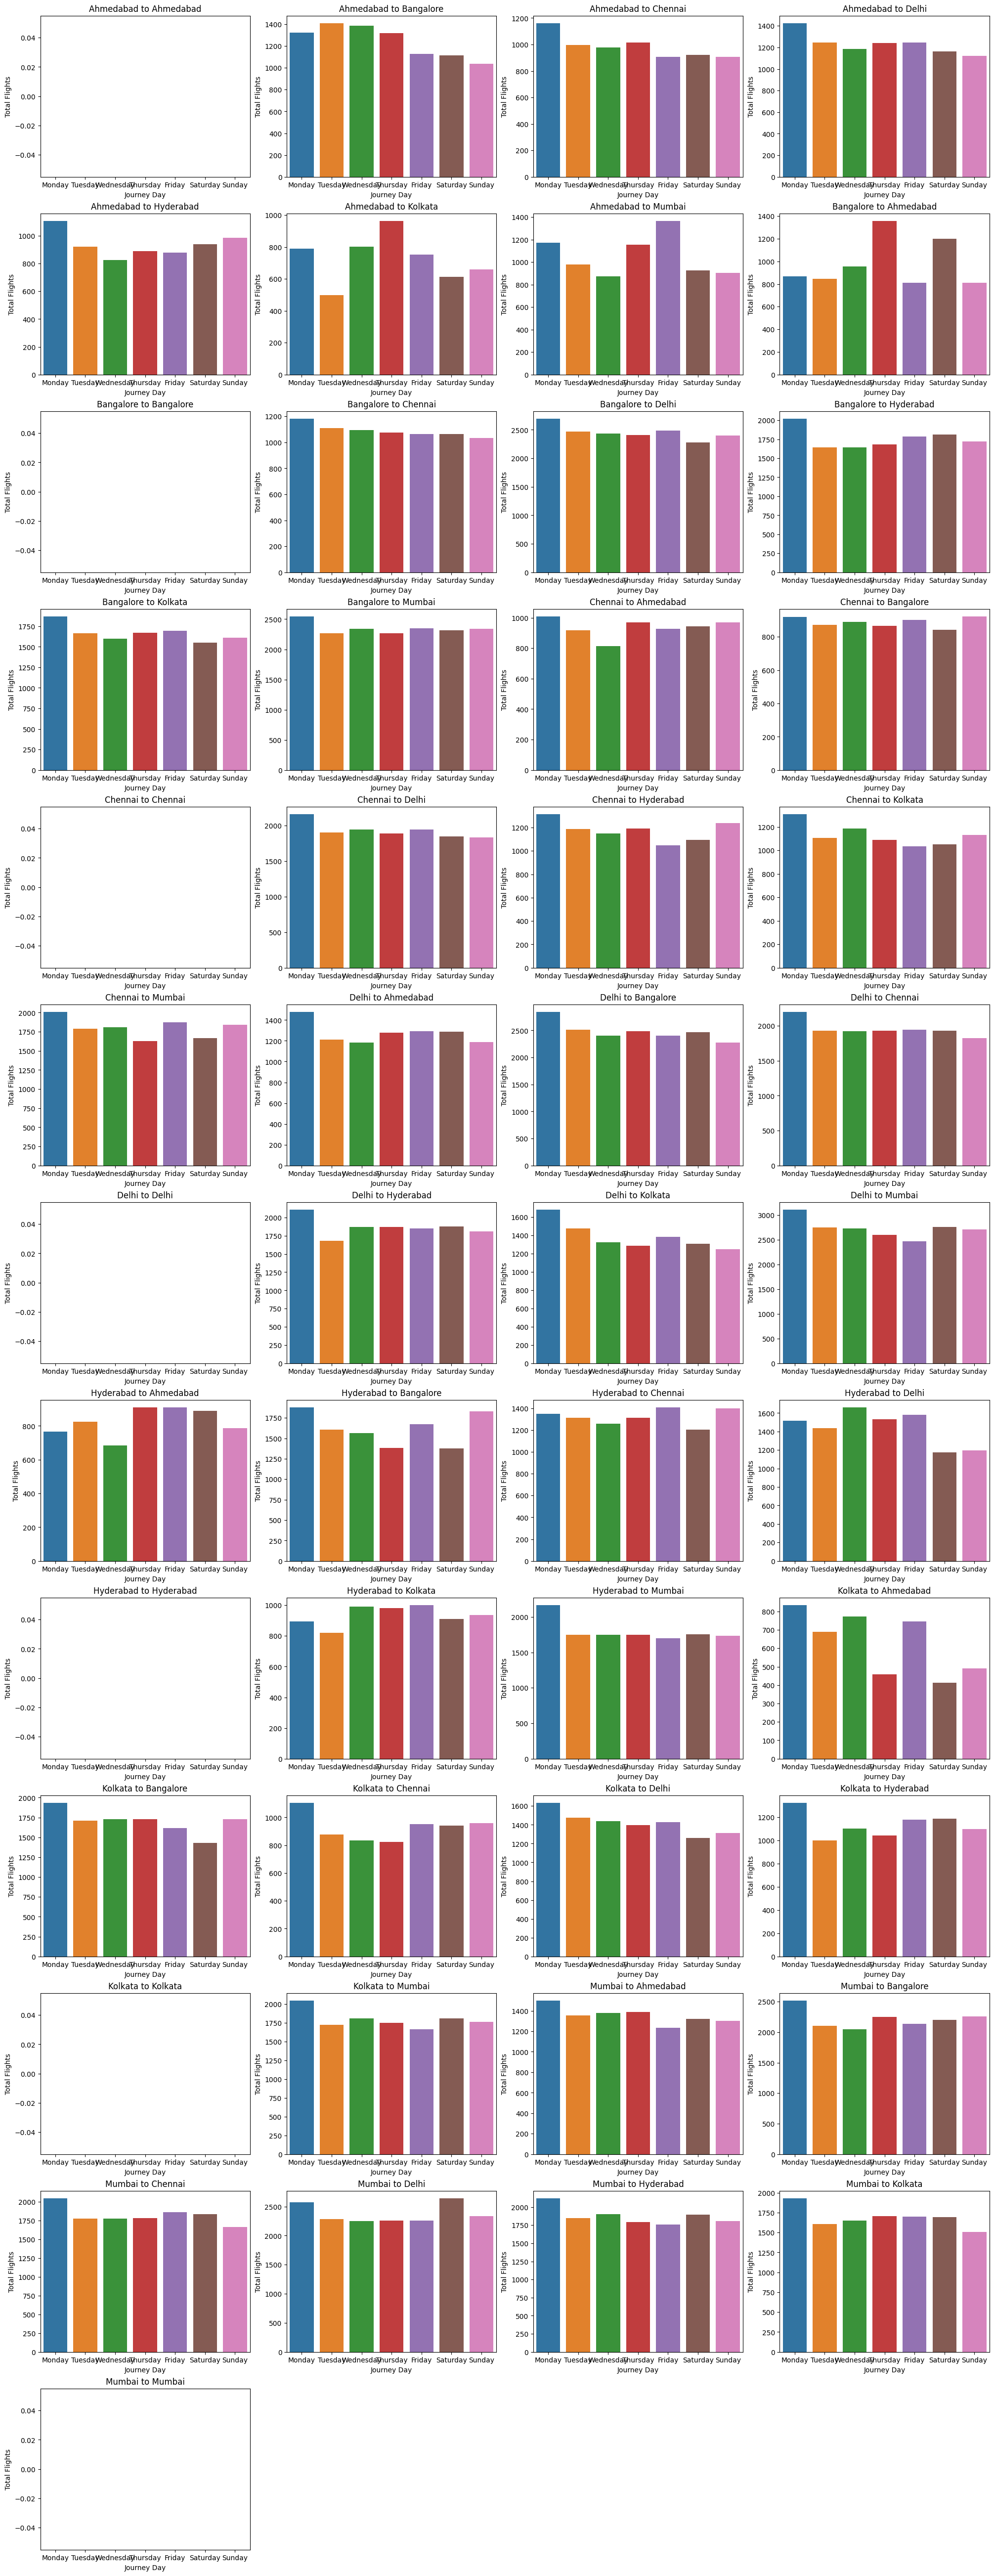

In [9]:
df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Aggregate the data
aggregated_data = df.groupby(['Source', 'Destination', 'Journey_day']).size().reset_index(name='Total_Flights')

# Create a grid of subplots
unique_pairs = aggregated_data[['Source', 'Destination']].drop_duplicates()
n_pairs = unique_pairs.shape[0]
cols = 4  # Number of columns for the subplots grid
rows = (n_pairs // cols) + (n_pairs % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plotting each pair
for i, (source, destination) in enumerate(unique_pairs.values):
    subset = aggregated_data[(aggregated_data['Source'] == source) & (aggregated_data['Destination'] == destination)]
    ax = axes[i]
    sns.barplot(data=subset, x='Journey_day', y='Total_Flights', ax=ax)
    ax.set_title(f'{source} to {destination}')
    ax.set_xlabel('Journey Day')
    ax.set_ylabel('Total Flights')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Class'] = le.fit_transform(df['Class'])
df['Arrival'] = le.fit_transform(df['Arrival'])
df['Departure'] = le.fit_transform(df['Departure'])
df['Journey_day'] = le.fit_transform(df['Journey_day'])
df['Flight_code'] = le.fit_transform(df['Flight_code'])
df['Total_stops'] = le.fit_transform(df['Total_stops'])

In [11]:
corr_mat = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [12]:
df.describe()

Date_of_journey    Journey_day        Airline  \
count                         440087  440087.000000  440087.000000   
mean   2023-02-09 14:40:42.395253760       2.960617       5.008132   
min              2023-01-16 00:00:00       0.000000       0.000000   
25%              2023-01-28 00:00:00       1.000000       0.000000   
50%              2023-02-10 00:00:00       3.000000       8.000000   
75%              2023-02-22 00:00:00       5.000000       8.000000   
max              2023-03-06 00:00:00       6.000000       8.000000   
std                              NaN       2.004737       3.444971   

         Flight_code          Class         Source      Departure  \
count  440087.000000  440087.000000  440087.000000  440087.000000   
mean     1019.830627       1.023145       3.161030       1.129036   
min         0.000000       0.000000       0.000000       0.000000   
25%       775.000000       0.000000       1.000000       0.000000   
50%      1247.000000       1.000000       3.000000       1.000000   
75%      1333.000000       1.000000       5.000000       2.000000   
max      1404.000000       3.000000       6.000000       3.000000   
std       366.865260       0.951934       1.966491       0.855587   

         Total_stops        Arrival    Destination  Duration_in_hours  \
count  440087.000000  440087.000000  440087.000000      440087.000000   
mean        0.290290       1.352421       3.191139          12.050249   
min         0.000000       0.000000       0.000000           0.750000   
25%         0.000000       1.000000       1.000000           6.500000   
50%         0.000000       2.000000       3.000000          11.166700   
75%         0.000000       2.000000       5.000000          16.166700   
max         2.000000       3.000000       6.000000          43.583300   
std         0.664249       0.903806       1.965632           7.188188   

           Days_left           Fare  
count  440087.000000  440087.000000  
mean       25.611602   22976.823458  
min         1.000000    1307.000000  
25%        13.000000    8674.000000  
50%        26.000000   13298.000000  
75%        38.000000   38124.000000  
max        50.000000  143019.000000  
std        14.303483   20460.696124

In [13]:
flights_per_day = df.groupby('Date_of_journey').size().reset_index(name='Total_Flights')
plt.figure (figsize=(20,10))
plt.plot(flights_per_day['Date_of_journey'], flights_per_day['Total_Flights'])

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

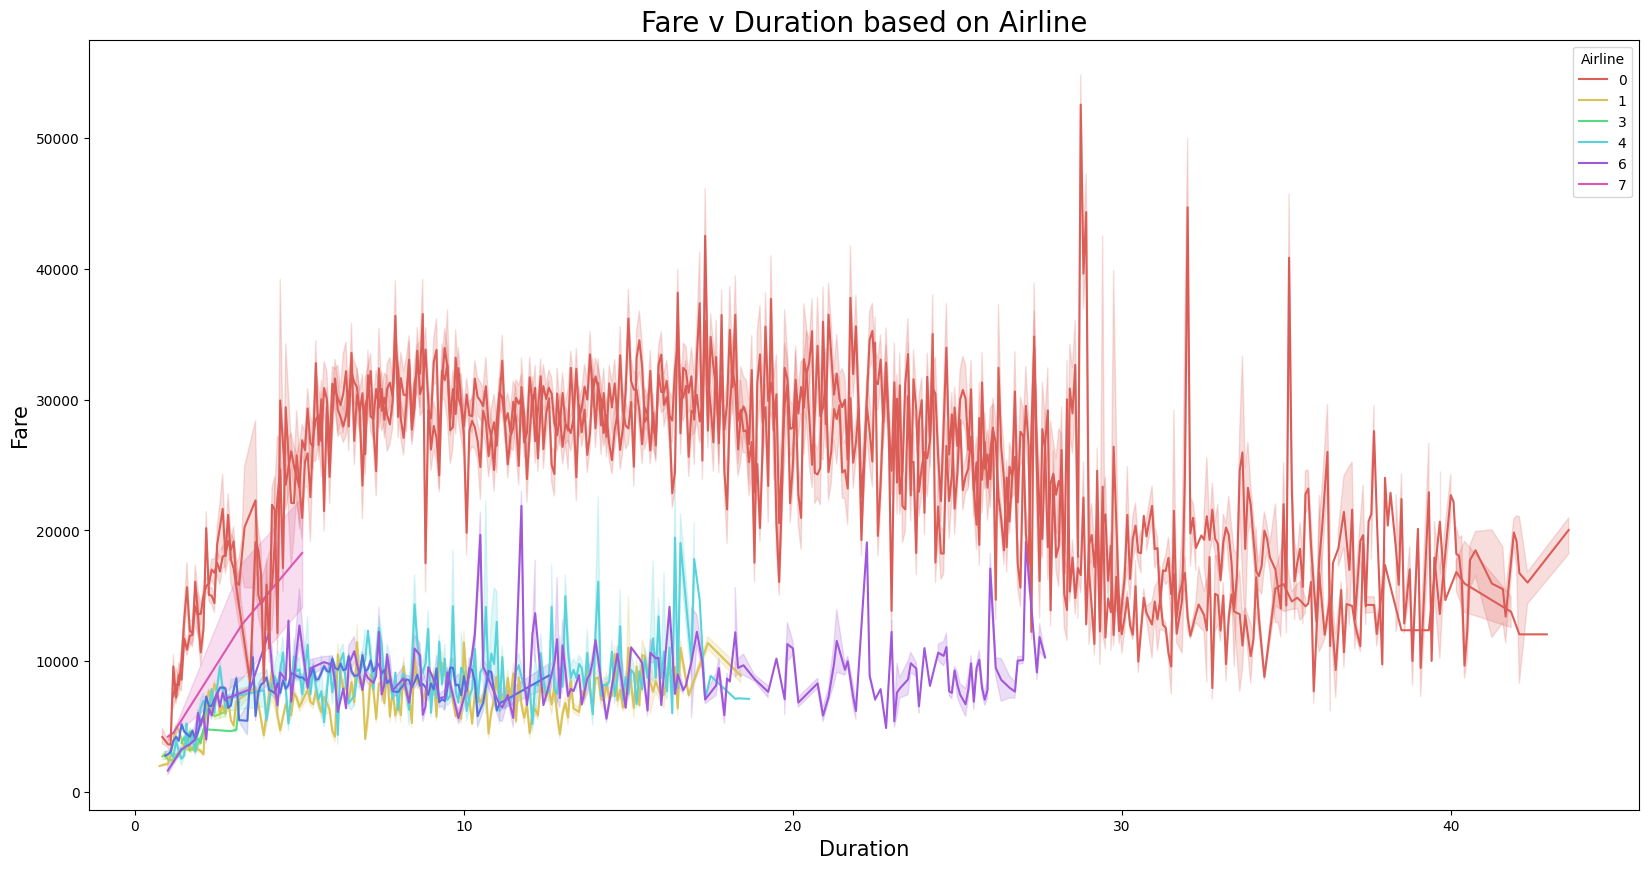

In [14]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = df,x = 'Duration_in_hours',y = 'Fare',hue = 'Airline',palette = 'hls')
plt.title('Fare v Duration based on Airline',fontsize = 20)
plt.xlabel('Duration',fontsize = 15)
plt.ylabel('Fare',fontsize = 15)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [16]:
df.head()

Date_of_journey  Journey_day  Airline  Flight_code  Class  Source  \
0      2023-01-16            1        6         1209      1       3   
1      2023-01-16            1        5          164      1       3   
2      2023-01-16            1        4          942      1       3   
3      2023-01-16            1        6         1224      1       3   
4      2023-01-16            1        0          852      1       3   

   Departure  Total_stops  Arrival  Destination  Duration_in_hours  Days_left  \
0          2            2        2            6             2.0833          1   
1          2            2        3            6             2.3333          1   
2          2            2        3            6             2.1667          1   
3          2            2        2            6             2.0833          1   
4          2            2        2            6             2.1667          1   

   Fare  
0  5335  
1  5899  
2  5801  
3  5794  
4  5955

In [17]:
df.to_csv('df_fixed.csv', index=False)

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

models_dict = {}

df.sort_values(by='Date_of_journey')

df['year'] = df['Date_of_journey'].dt.year
df['month'] = df['Date_of_journey'].dt.month
df['day'] = df['Date_of_journey'].dt.day


X=df.drop(['Fare','Date_of_journey','Flight_code'],axis=1)
y=df['Fare']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X['Duration_in_hours'] = scaler.fit_transform(X[['Duration_in_hours']])
X['Days_left'] = scaler.fit_transform(X[['Days_left']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

Journey_day  Airline  Class  Source  Departure  Total_stops  Arrival  \
399557            6        8      3       0          0            2        0   
346065            5        0      0       2          1            0        2   
388087            1        8      3       2          1            0        1   
41987             3        0      0       3          2            0        0   
83137             4        8      1       6          1            0        0   
...             ...      ...    ...     ...        ...          ...      ...   
259178            5        1      1       4          2            2        2   
365838            3        8      0       2          1            2        1   
131932            0        8      1       6          0            0        2   
146867            2        8      1       6          1            0        2   
121958            6        8      1       6          1            0        2   

        Destination  Duration_in_hours  Days_left  year  month  day  
399557            3          -1.456134  -0.602064  2023      2    1  
346065            3          -0.308416  -0.671977  2023      1   31  
388087            5           1.418962   0.726285  2023      2   20  
41987             4           0.746566  -0.322411  2023      2    5  
83137             3          -0.238857  -1.510935  2023      1   19  
...             ...                ...        ...   ...    ...  ...  
259178            1          -1.514090  -0.671977  2023      1   31  
365838            6          -1.386575   1.145764  2023      2   26  
131932            5           2.044989  -0.462238  2023      2    3  
146867            2          -0.180887   0.586459  2023      2   18  
121958            4          -0.354784   0.376720  2023      2   15  

[308060 rows x 13 columns]

In [19]:
model = DecisionTreeRegressor(criterion='squared_error', random_state=42)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

In [20]:
score = r2_score(y_preds, y_test)
print (score)

0.9120272171995132


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [21]:
def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def RMSE (y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred) ** 2))

print (MAPE (y_test, y_preds))
RMSE (y_test, y_preds)
models_dict['DecisionTreeRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

12.104666532300895


In [22]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Figure size 2000x800 with 0 Axes>

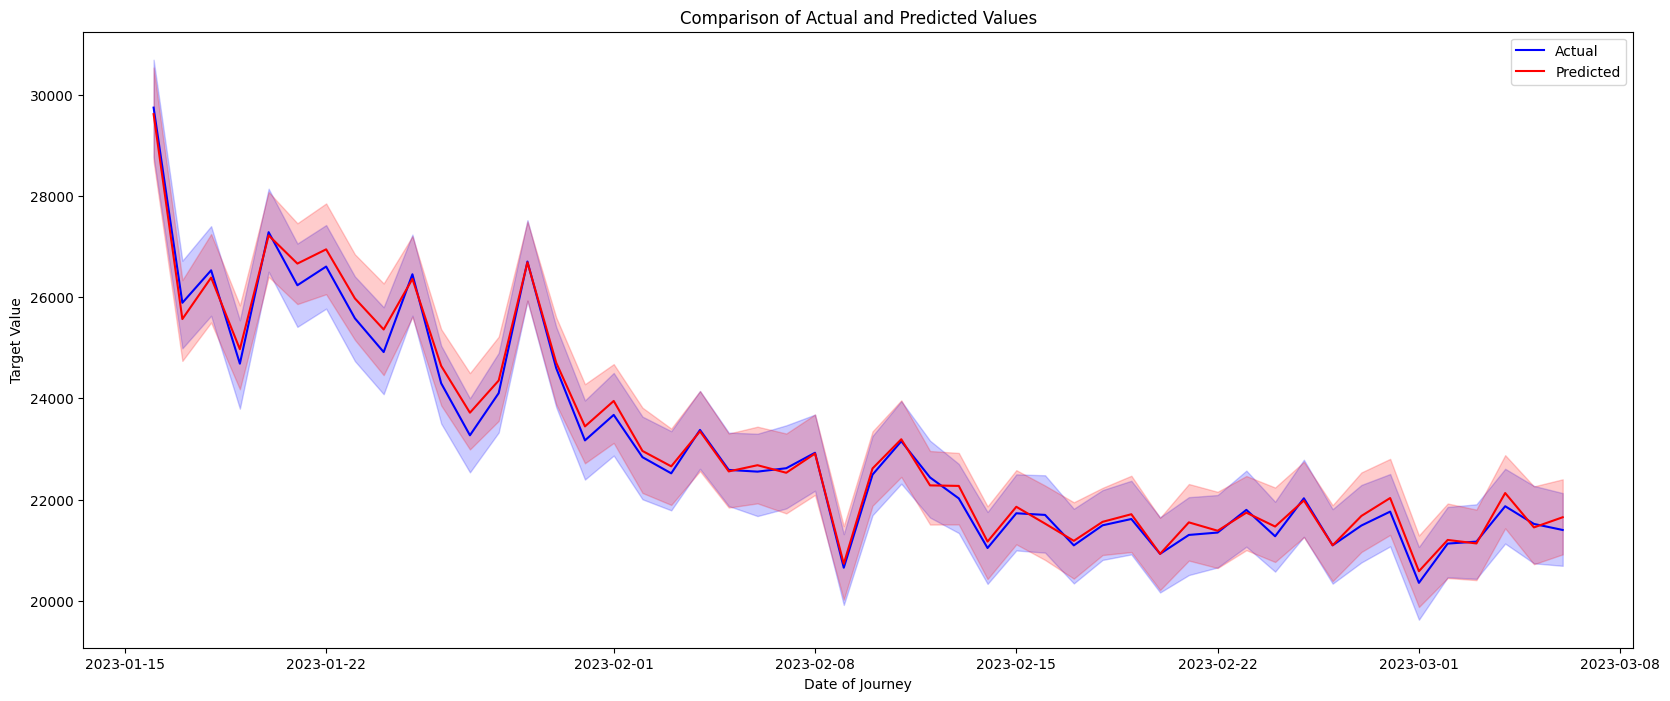

In [23]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

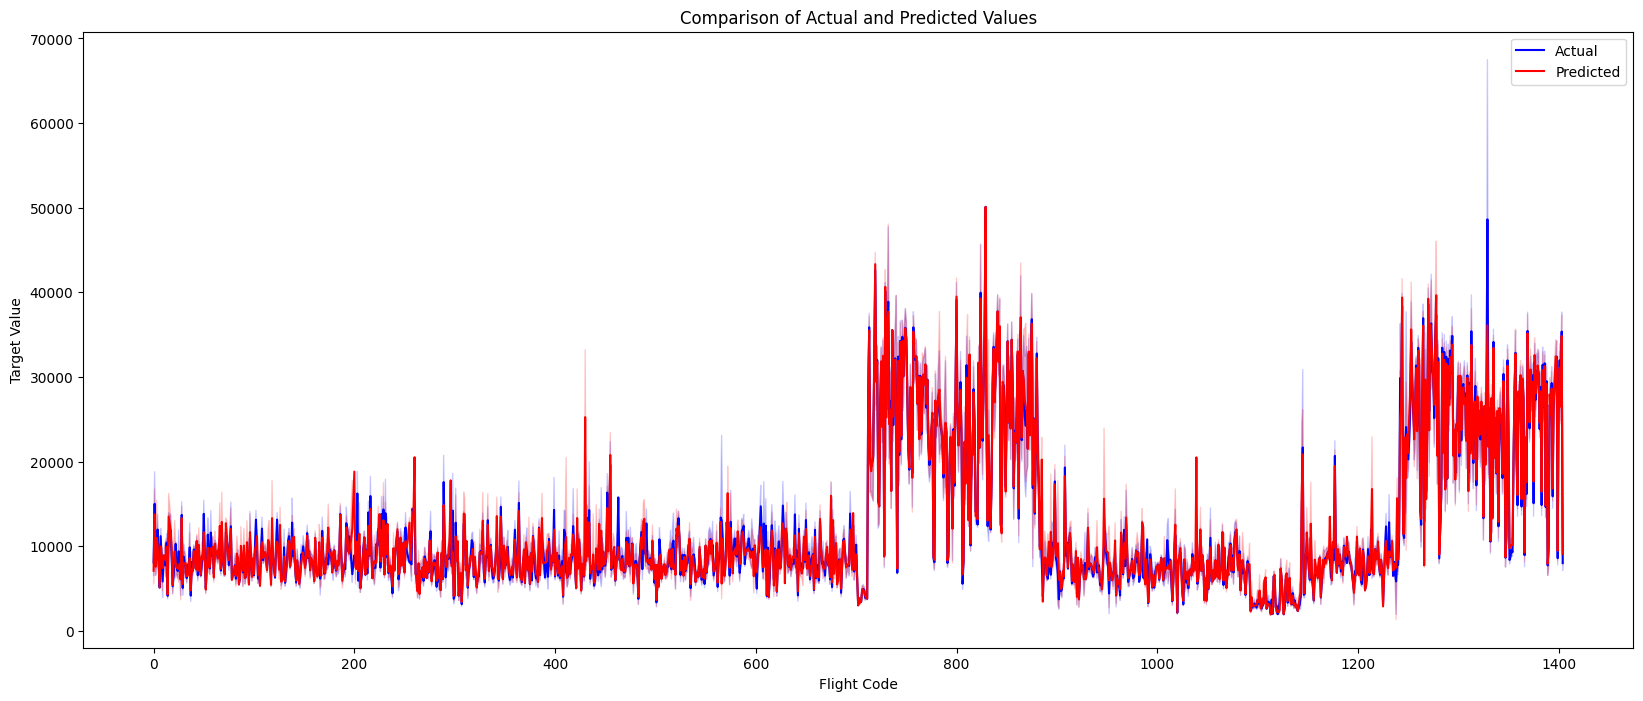

In [24]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

In [26]:
score = r2_score(y_preds, y_test)
print (score)
print(MAPE (y_test, y_preds))

models_dict['RandomForestRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9495980540668167
10.394278723916853


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Figure size 2000x800 with 0 Axes>

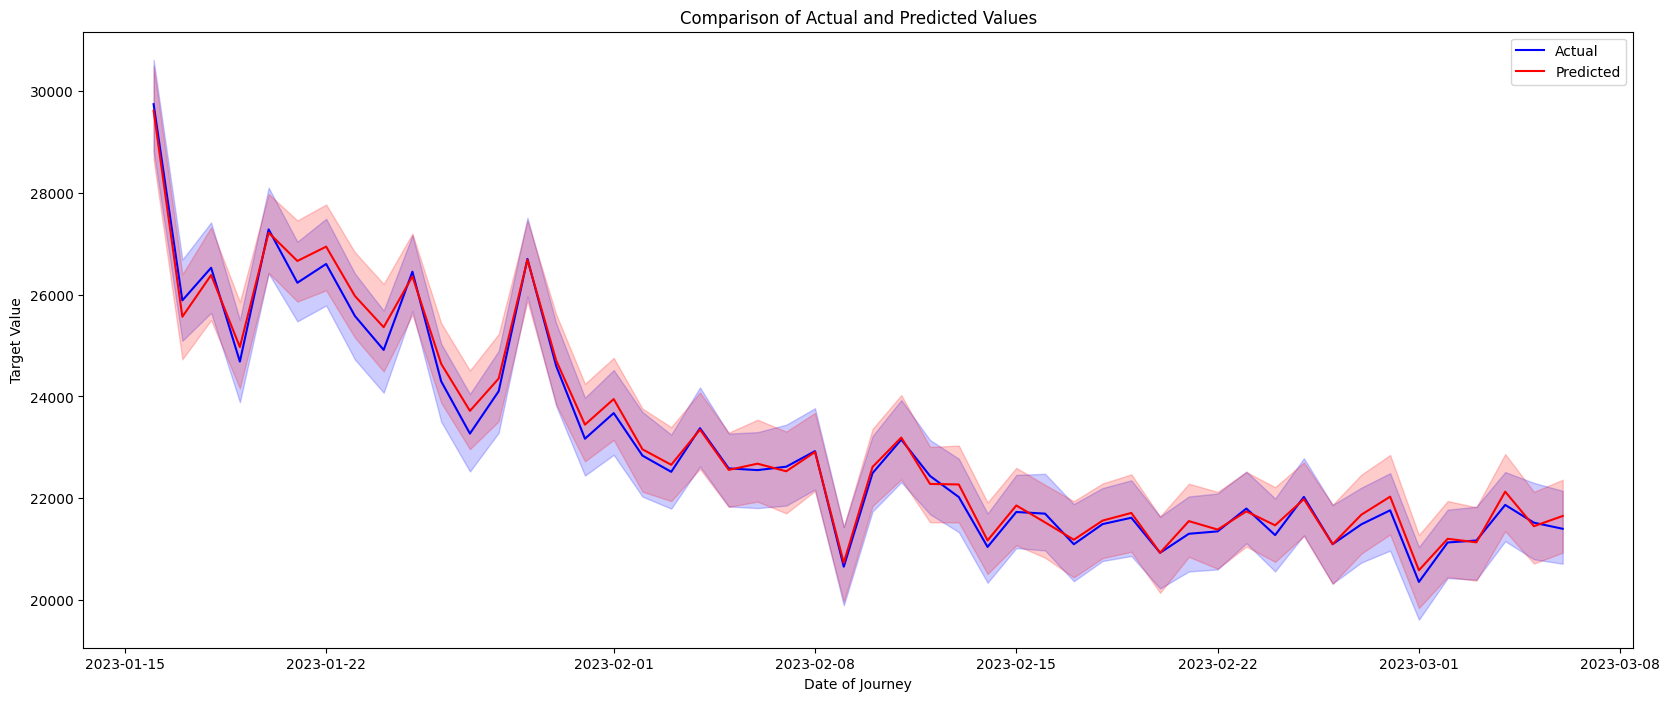

In [27]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

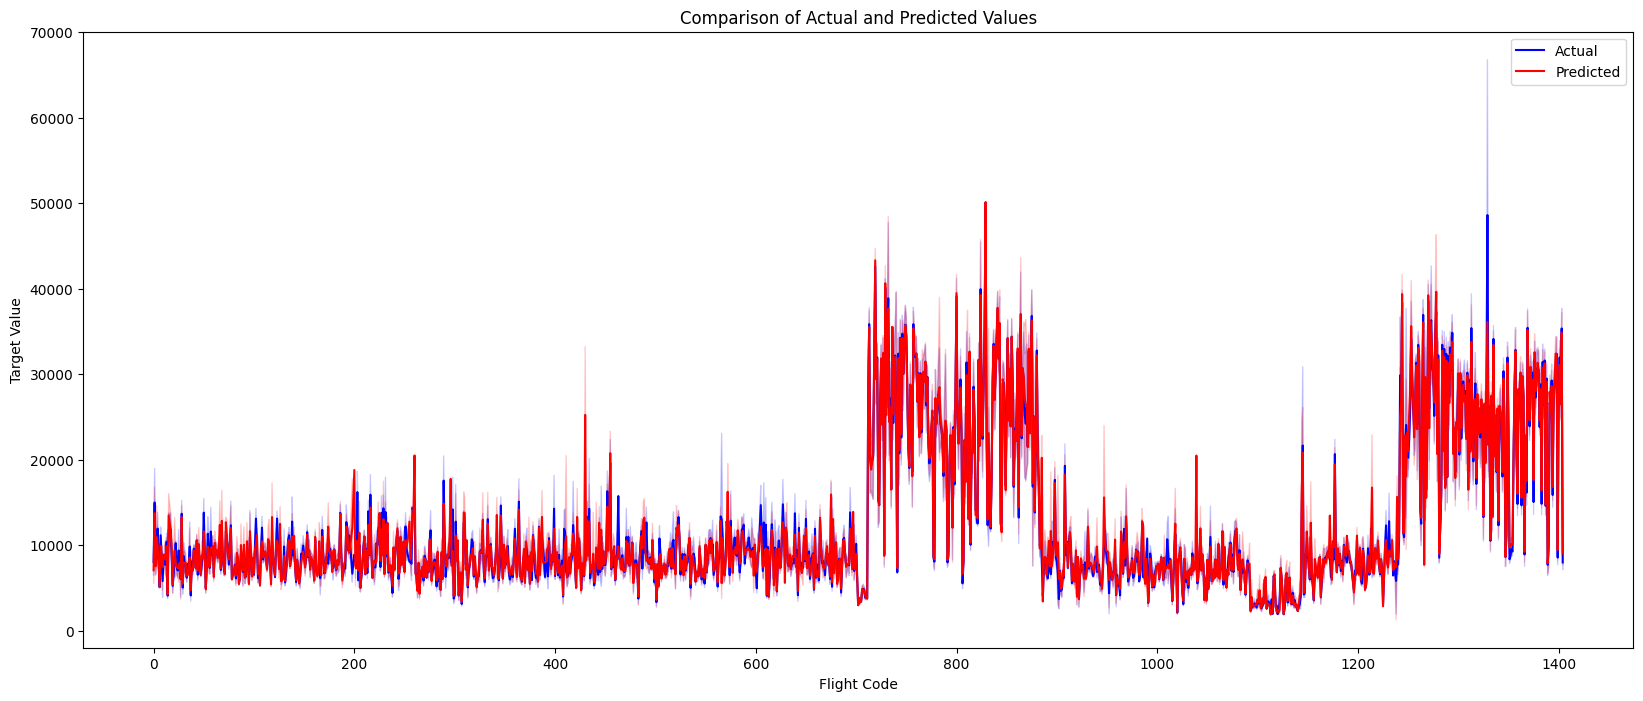

In [28]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [29]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.get_params()

model = xgb.XGBRegressor(
    booster='gbtree',
    learning_rate=0.3,
    n_estimators=200,
    max_depth=7,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_lambda=1,
    reg_alpha=0,
    objective='reg:squarederror',
    seed=42
)

In [30]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


In [31]:
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['XGBRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9424631898240958
14.363856163868702


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [32]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

Date_of_journey  Journey_day  Airline  Flight_code  Class  Source  \
2        2023-01-16            1        4          942      1       3   
6        2023-01-16            1        0          859      1       3   
7        2023-01-16            1        4          930      1       3   
11       2023-01-16            1        5          104      1       3   
16       2023-01-16            1        1          987      1       3   
..              ...          ...      ...          ...    ...     ...   
321      2023-01-16            1        0          768      0       3   
323      2023-01-16            1        8         1291      0       3   
326      2023-01-16            1        0          745      0       3   
327      2023-01-16            1        8         1257      0       3   
328      2023-01-16            1        8         1267      0       3   

     Departure  Total_stops  Arrival  Destination  Duration_in_hours  \
2            2            2        3            6             2.1667   
6            2            2        3            6             2.2500   
7            2            2        2            6             2.2500   
11           2            0        1            6             8.6667   
16           1            0        2            6             9.5000   
..         ...          ...      ...          ...                ...   
321          1            0        1            6            20.3333   
323          0            0        2            6             7.2500   
326          2            0        1            6            12.5000   
327          1            0        0            6             5.5000   
328          1            0        0            6             6.5000   

     Days_left   Fare  year  month  day  Price_actual    Price_pred  
2            1   5801  2023      1   16          5801   7150.353516  
6            1   5955  2023      1   16          5955   7108.446777  
7            1   5899  2023      1   16          5899   7457.444336  
11           1   6390  2023      1   16          6390   8099.263184  
16           1   6872  2023      1   16          6872   8093.580566  
..         ...    ...   ...    ...  ...           ...           ...  
321          1  57074  2023      1   16         57074  45851.242188  
323          1  58025  2023      1   16         58025  71930.421875  
326          1  58025  2023      1   16         58025  57066.777344  
327          1  62057  2023      1   16         62057  86051.882812  
328          1  62057  2023      1   16         62057  85532.632812  

[100 rows x 18 columns]

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

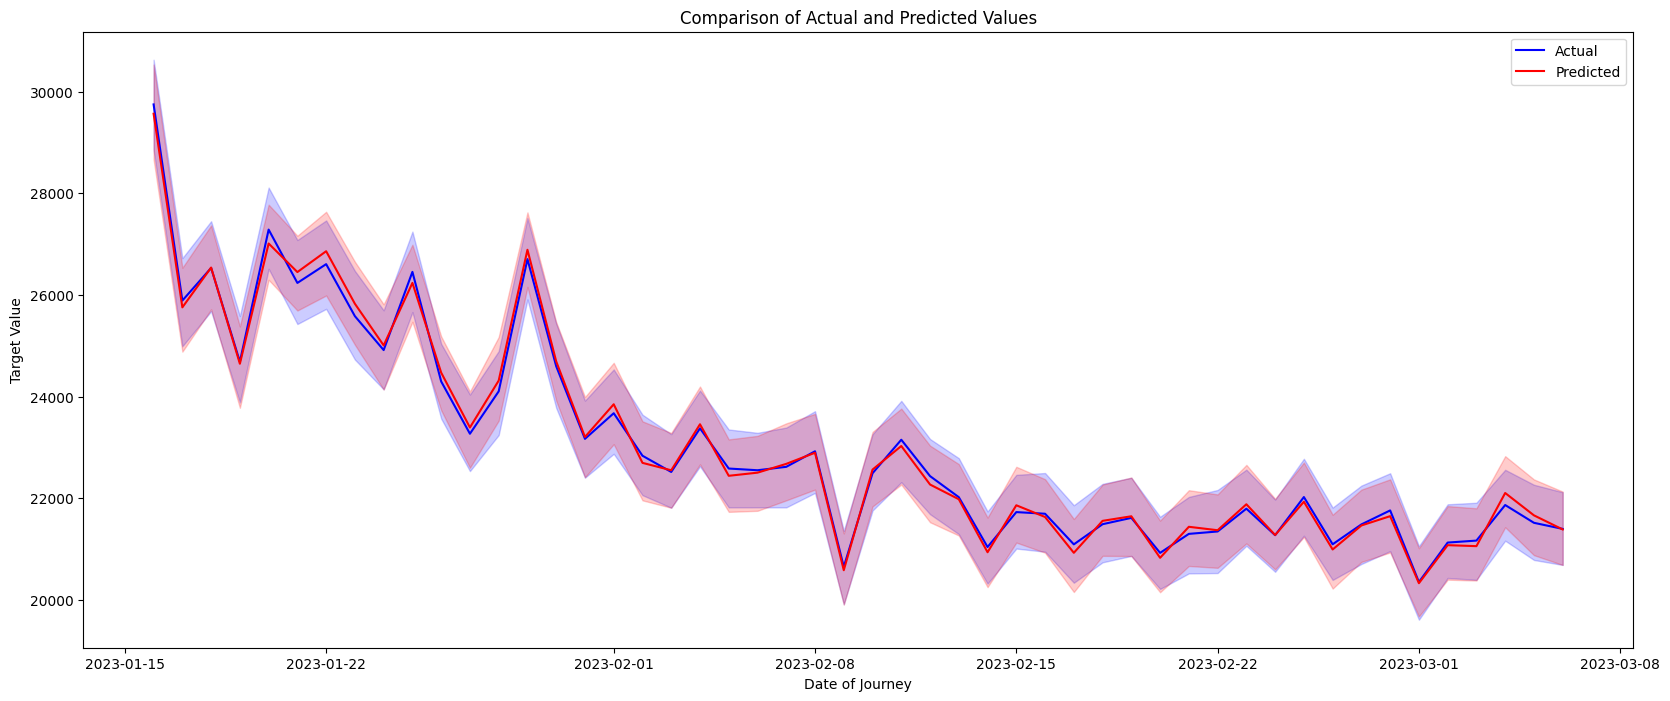

In [33]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

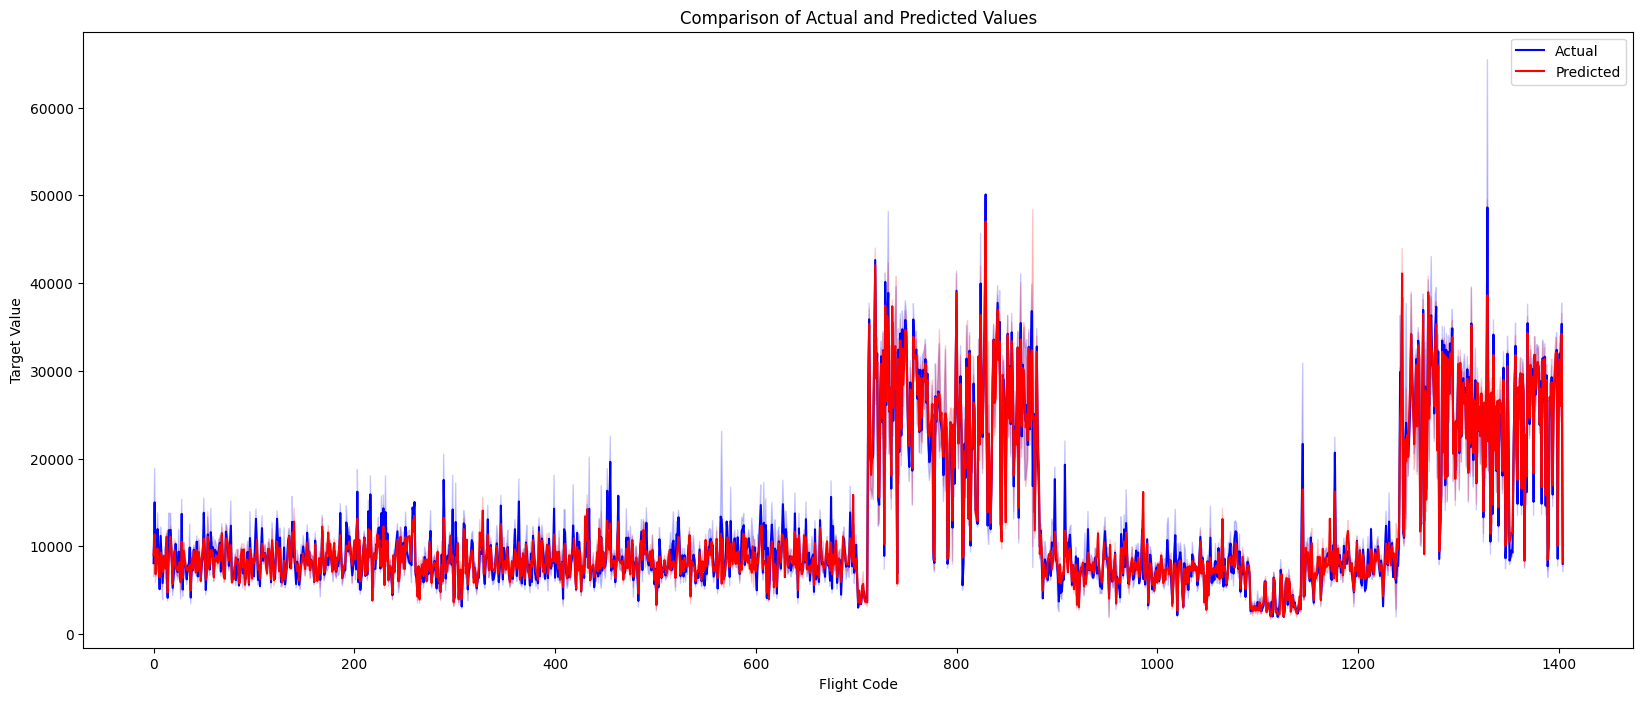

In [34]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [35]:
import catboost as cb

model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.3,
    depth=7,
    loss_function='MAE',
    random_seed=42
)


In [36]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


0:	learn: 10534.6579527	total: 119ms	remaining: 1m 58s
1:	learn: 8040.1683585	total: 149ms	remaining: 1m 14s
2:	learn: 6446.6498031	total: 186ms	remaining: 1m 1s
3:	learn: 5453.5642278	total: 223ms	remaining: 55.4s
4:	learn: 4876.4864203	total: 263ms	remaining: 52.4s
5:	learn: 4533.1181994	total: 309ms	remaining: 51.2s
6:	learn: 4331.7530844	total: 345ms	remaining: 48.9s
7:	learn: 4193.1976282	total: 380ms	remaining: 47.1s
8:	learn: 4125.1888384	total: 416ms	remaining: 45.8s
9:	learn: 4065.0002458	total: 451ms	remaining: 44.7s
10:	learn: 4024.8116918	total: 488ms	remaining: 43.9s
11:	learn: 4005.1850884	total: 525ms	remaining: 43.2s
12:	learn: 3966.4956068	total: 559ms	remaining: 42.5s
13:	learn: 3941.5560038	total: 597ms	remaining: 42s
14:	learn: 3893.2843049	total: 629ms	remaining: 41.3s
15:	learn: 3867.8766137	total: 667ms	remaining: 41s
16:	learn: 3845.9072437	total: 703ms	remaining: 40.7s
17:	learn: 3828.0265571	total: 742ms	remaining: 40.5s
18:	learn: 3809.5415309	total: 788ms	re

In [37]:
y_preds.shape
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['CatBoostRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9266902674999299
12.511219946442582


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Figure size 2000x800 with 0 Axes>

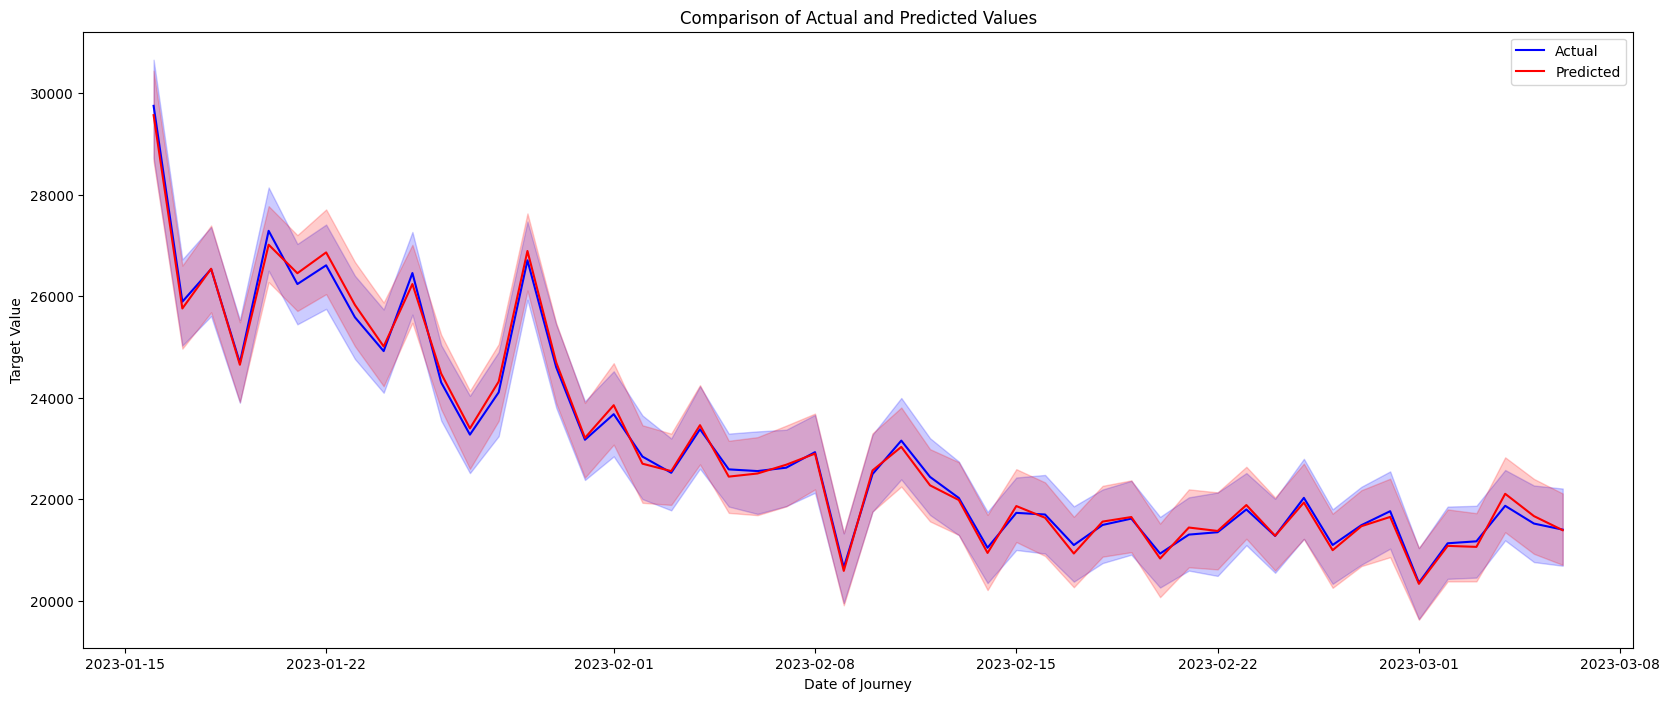

In [38]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

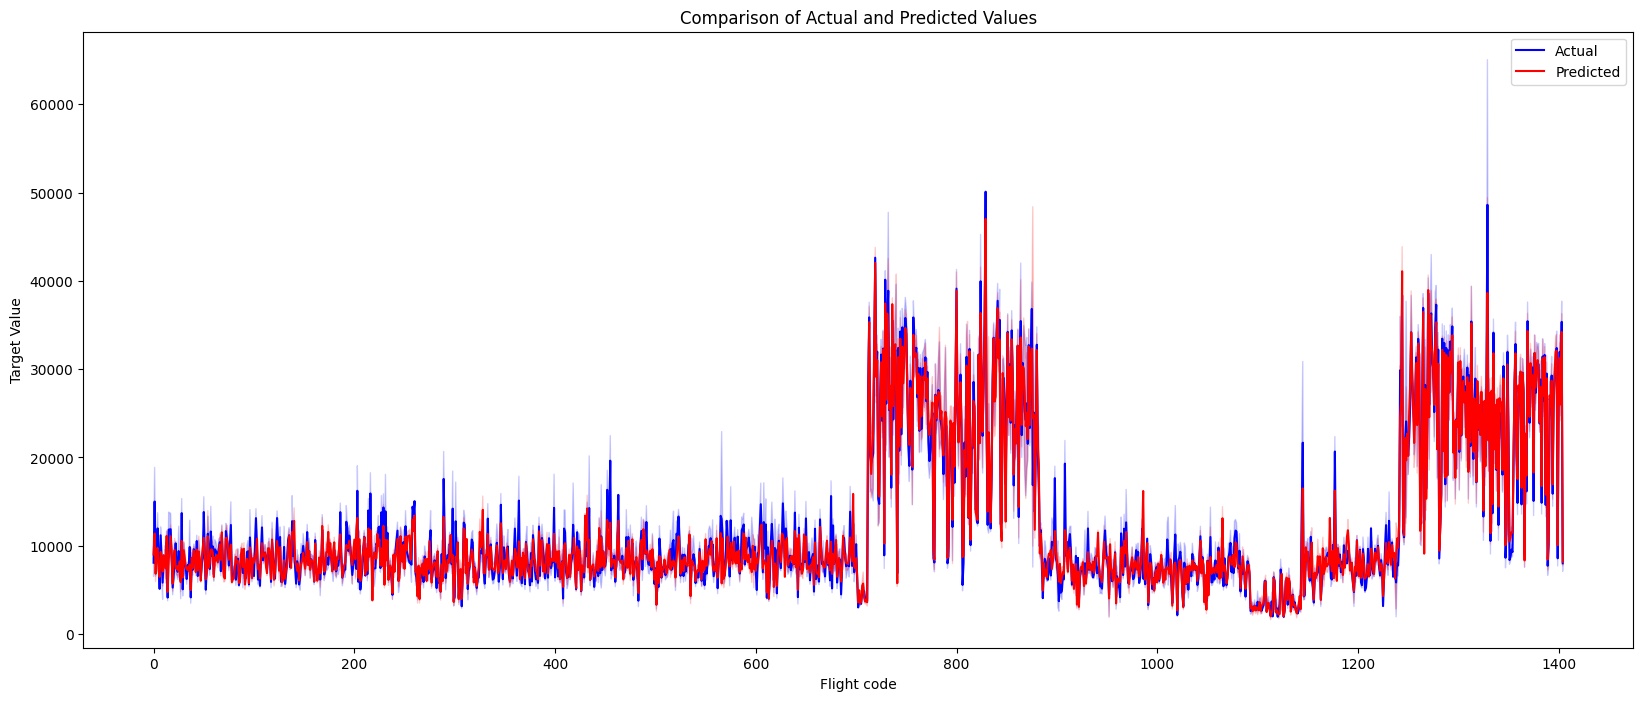

In [39]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [40]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

In [41]:
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['BaggingRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.949622489784274
10.394183034737619


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Figure size 2000x800 with 0 Axes>

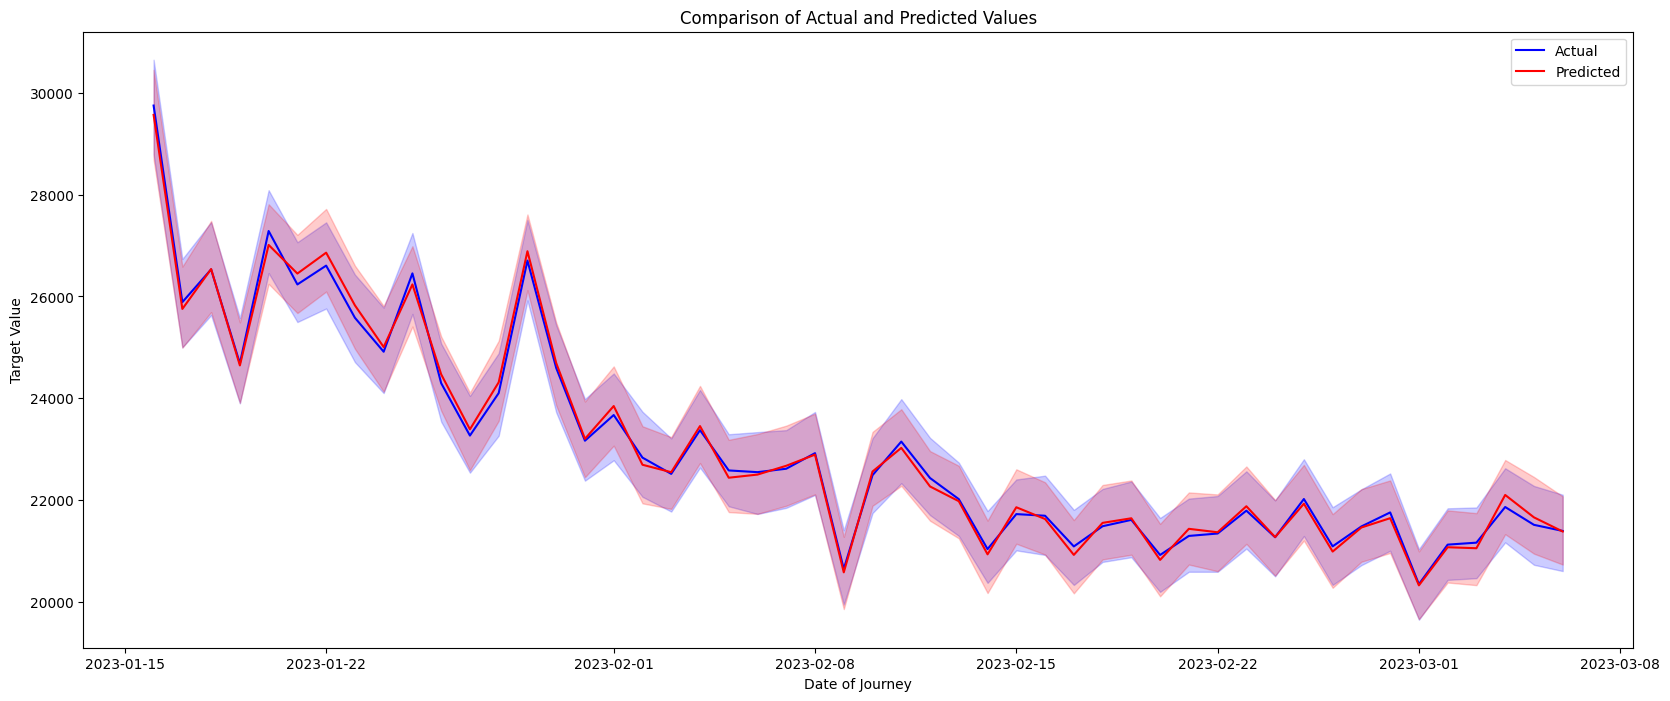

In [42]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

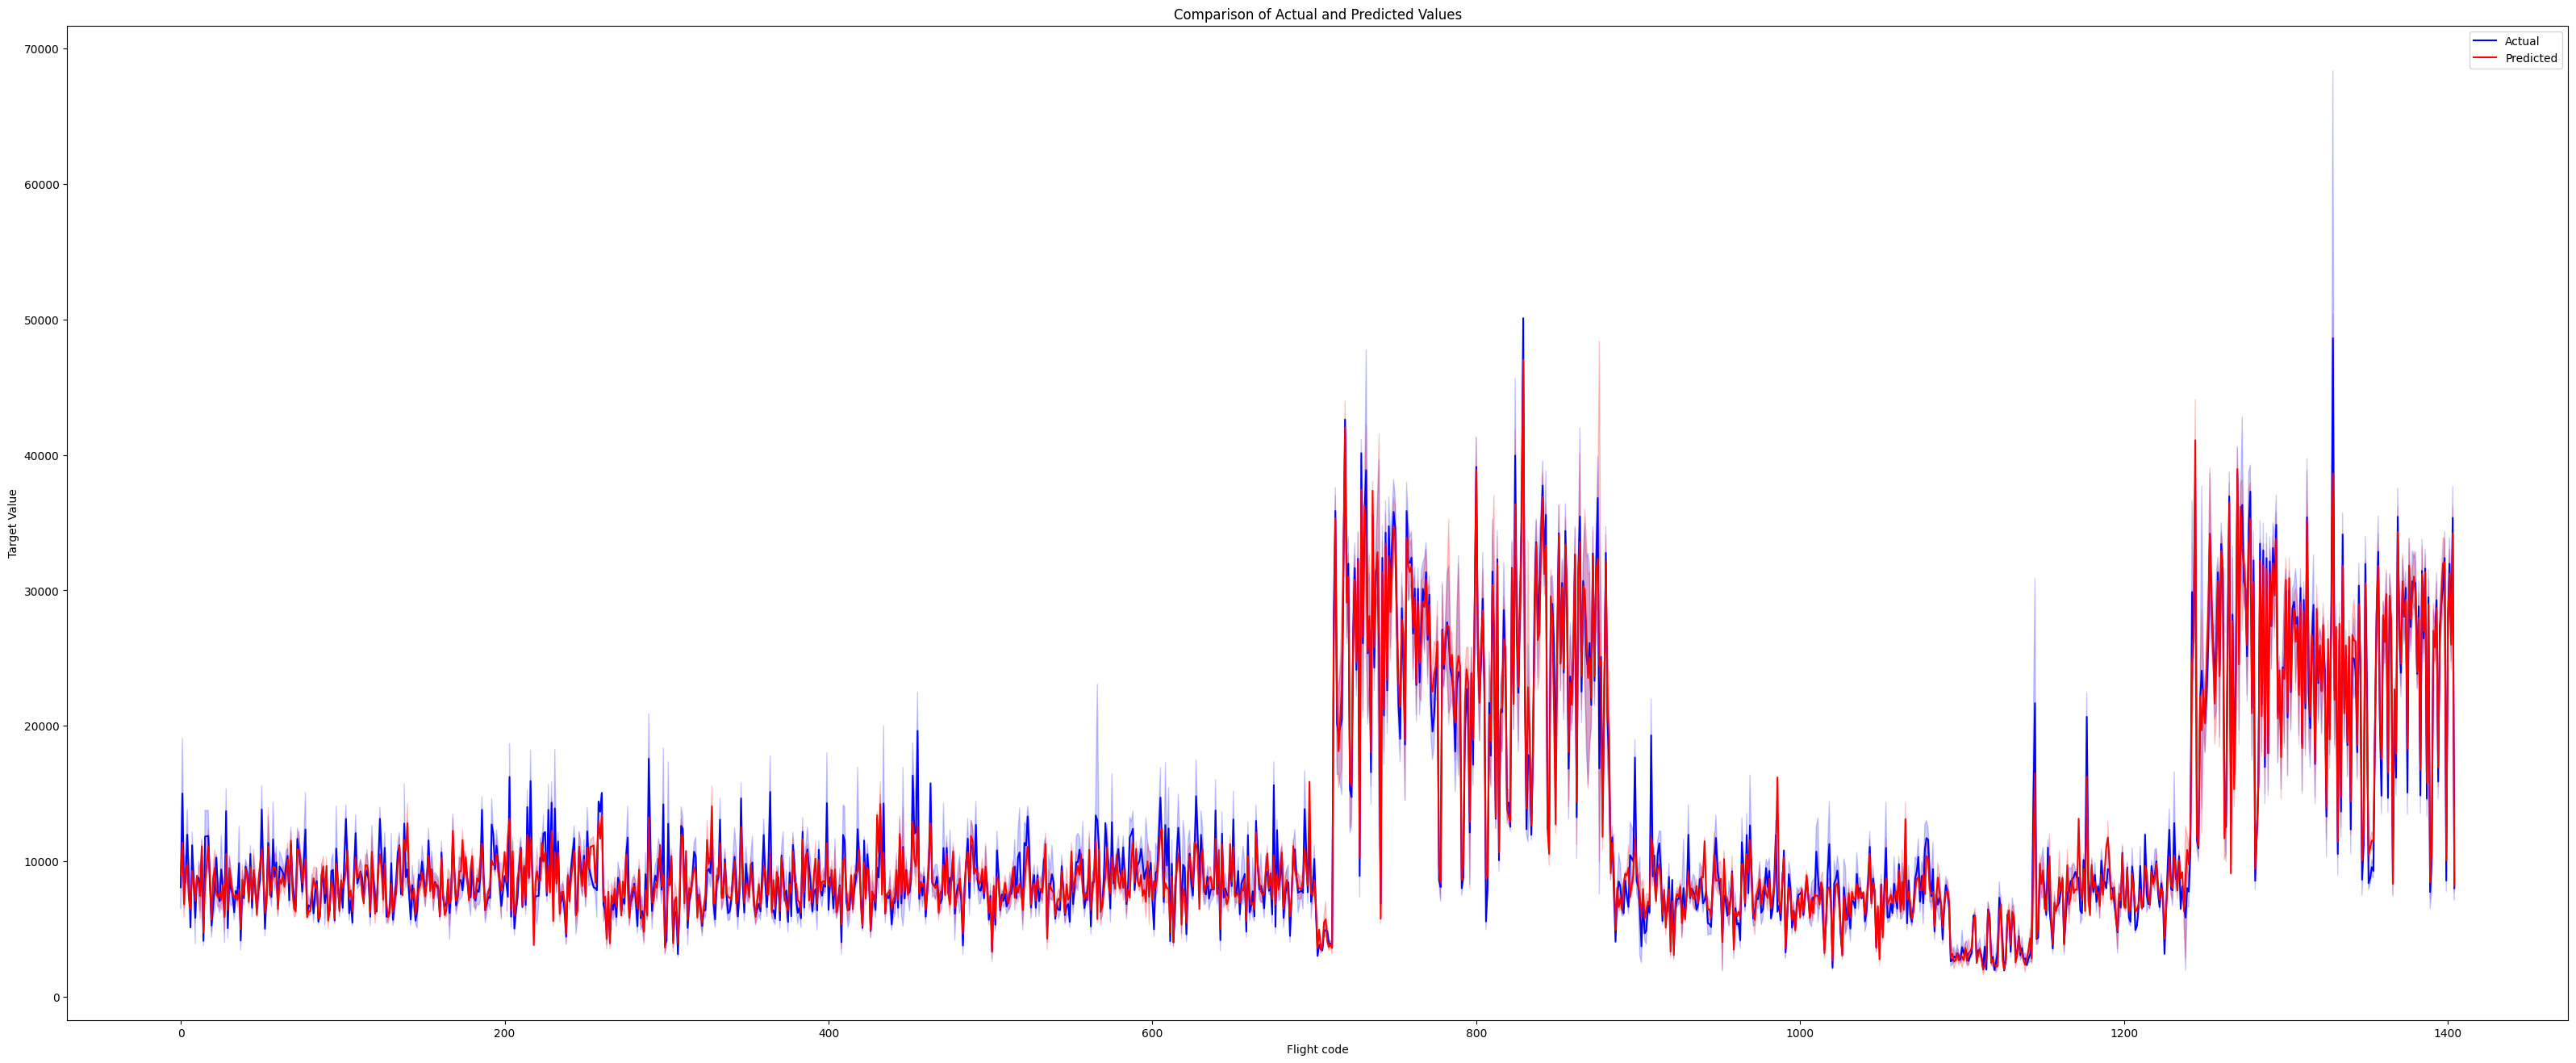

In [43]:
plt.figure(figsize=(40,16))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [44]:
model = "LSTMModel((lstm): LSTM(13, 50, num_layers=4, batch_first=True), (fc): Linear(in_features=50, out_features=1, bias=True))"

R2_Score = 0.8519364959859111

MAPE = 23.626225

RMSE = 4997.5527

models_dict['LSTM'] = (model, R2_Score, MAPE, RMSE)

In [45]:
models_df = pd.DataFrame(models_dict).T
models_df.columns = ['Model','R2 Score', 'MAPE', 'RMSE']
models_df

Model  \
DecisionTreeRegressor             DecisionTreeRegressor(random_state=42)   
RandomForestRegressor  (DecisionTreeRegressor(max_features=1.0, rando...   
XGBRegressor           XGBRegressor(base_score=None, booster='gbtree'...   
CatBoostRegressor      <catboost.core.CatBoostRegressor object at 0x0...   
BaggingRegressor       (DecisionTreeRegressor(random_state=1952926171...   
LSTM                   LSTMModel((lstm): LSTM(13, 50, num_layers=4, b...   

                       R2 Score       MAPE         RMSE  
DecisionTreeRegressor  0.912027  12.104667  6105.454977  
RandomForestRegressor  0.949598  10.394279   4509.81759  
XGBRegressor           0.942463  14.363856  4753.443159  
CatBoostRegressor       0.92669   12.51122  5251.257659  
BaggingRegressor       0.949622  10.394183  4508.127092  
LSTM                   0.851936  23.626225    4997.5527